**Case File -#002-Feature Forge + Regression**[Day-02]


---

Dataset: Mental Health and Burnout in the Workplace

Importing Libraries and Loading the Dataset   
In this step, I imported essential libraries for data processing, visualization, feature selection, and regression modeling. I also mounted Google Drive to access the dataset and loaded it using pandas. This dataset will be used for analyzing factors affecting employee stress levels.



In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ACM-TASKS/mental_health_workplace_survey.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,5.06,9.47,4.16,7.0,7.9,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,2.00,5.65,3.74,7.2,9.0,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,7.17,5.70,8.80,5.2,9.7,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,3.76,6.40,4.69,8.7,5.8,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,2.34,3.41,2.12,4.2,3.3,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


Checking Data Types and Missing Values   
I printed the data types of each column to understand the structure of the dataset. Then, I checked for missing values to identify any data that may need cleaning or imputation before further processing.

In [ ]:
print(df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

EmployeeID                  int64
Age                         int64
Gender                     object
Country                    object
JobRole                    object
Department                 object
YearsAtCompany              int64
WorkHoursPerWeek            int64
RemoteWork                 object
BurnoutLevel              float64
JobSatisfaction           float64
StressLevel               float64
ProductivityScore         float64
SleepHours                float64
PhysicalActivityHrs       float64
CommuteTime                 int64
HasMentalHealthSupport     object
ManagerSupportScore       float64
HasTherapyAccess           object
MentalHealthDaysOff         int64
SalaryRange                object
WorkLifeBalanceScore      float64
TeamSize                    int64
CareerGrowthScore         float64
BurnoutRisk                 int64
dtype: object

Missing values:
 EmployeeID                0
Age                       0
Gender                    0
Country                   0
JobRol

 Ordinal Encoding of Salary Range     
 In this part, I converted the SalaryRange column into numerical form using ordinal encoding, assigning increasing integers to represent higher salary brackets.

In [ ]:
ordinal_map = {
    '<40K': 0,
    '40K-60K': 1,
    '60K-80K': 2,
    '80K-100K': 3,
    '100K+': 4
}
df['SalaryRangeEncoded'] = df['SalaryRange'].map(ordinal_map)

In [ ]:
df[['SalaryRange', 'SalaryRangeEncoded']].head()

,SalaryRange,SalaryRangeEncoded
0,40K-60K,1
1,80K-100K,3
2,80K-100K,3
3,60K-80K,2
4,<40K,0


One-Hot Encoding of Categorical Features    
In this part, I applied one-hot encoding to convert categorical variables such as Gender, Country, JobRole, Department, RemoteWork, HasMentalHealthSupport, and HasTherapyAccess into numerical format. This is done using pd.get_dummies, which creates new binary columns for each category.

In [ ]:
one_hot_cols = [
    'Gender', 'Country', 'JobRole', 'Department',
    'RemoteWork', 'HasMentalHealthSupport', 'HasTherapyAccess'
]
df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [ ]:
df_encoded.head()
df_encoded.shape

(3000, 44)

Feature Scaling    
Selected all numerical columns (excluding StressLevel and EmployeeID) and scaled them using StandardScaler to normalize the data for better model performance. Displayed summary stats to confirm scaling.

In [ ]:
num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('StressLevel')
num_cols.remove('EmployeeID')
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [ ]:
df_encoded[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,-4.736952e-17,1.000167,-1.708073,-0.890625,0.017651,0.835099,1.652548
YearsAtCompany,3000.0,-9.710751e-17,1.000167,-1.673731,-0.845096,-0.016462,0.812172,1.640806
WorkHoursPerWeek,3000.0,2.498742e-16,1.000167,-1.708340,-0.883852,0.058421,0.882910,1.707398
BurnoutLevel,3000.0,2.664535e-17,1.000167,-1.752044,-0.858369,-0.011321,0.827956,1.744944
JobSatisfaction,3000.0,2.368476e-18,1.000167,-1.710680,-0.870278,-0.002891,0.864496,1.758868
ProductivityScore,3000.0,-9.118632e-17,1.000167,-1.733508,-0.858998,-0.011338,0.875637,1.718503
SleepHours,3000.0,1.965835e-16,1.000167,-1.761194,-0.859441,0.042313,0.874701,1.707089
PhysicalActivityHrs,3000.0,-6.454097e-17,1.000167,-1.758543,-0.849627,-0.010627,0.863331,1.737289
CommuteTime,3000.0,8.763360e-17,1.000167,-1.701731,-0.868493,-0.006522,0.884181,1.717419
ManagerSupportScore,3000.0,2.818486e-16,1.000167,-1.710665,-0.878925,-0.000978,0.865417,1.751066


Correlation Analysis    
Dropped the original SalaryRange column after encoding. Computed the correlation matrix to find how features relate to StressLevel. Displayed the top positive and negative correlations, and visualized them using a heatmap to identify strongly related variables for model insights.

Top positive correlations:
 StressLevel                1.000000
Department_IT              0.030686
Country_USA                0.029805
JobRole_Project Manager    0.028002
TeamSize                   0.024669
HasTherapyAccess_Yes       0.023196
JobRole_Sales Associate    0.020579
Country_UK                 0.017729
Department_Marketing       0.014847
BurnoutLevel               0.014534
Name: StressLevel, dtype: float64

Top negative correlations:
 Gender_Non-binary           -0.020557
Department_Sales            -0.020773
Country_Canada              -0.020939
Department_HR               -0.021632
RemoteWork_Yes              -0.022071
Country_India               -0.022414
Department_Support          -0.025458
YearsAtCompany              -0.027008
JobRole_Software Engineer   -0.032547
ManagerSupportScore         -0.037828
Name: StressLevel, dtype: float64


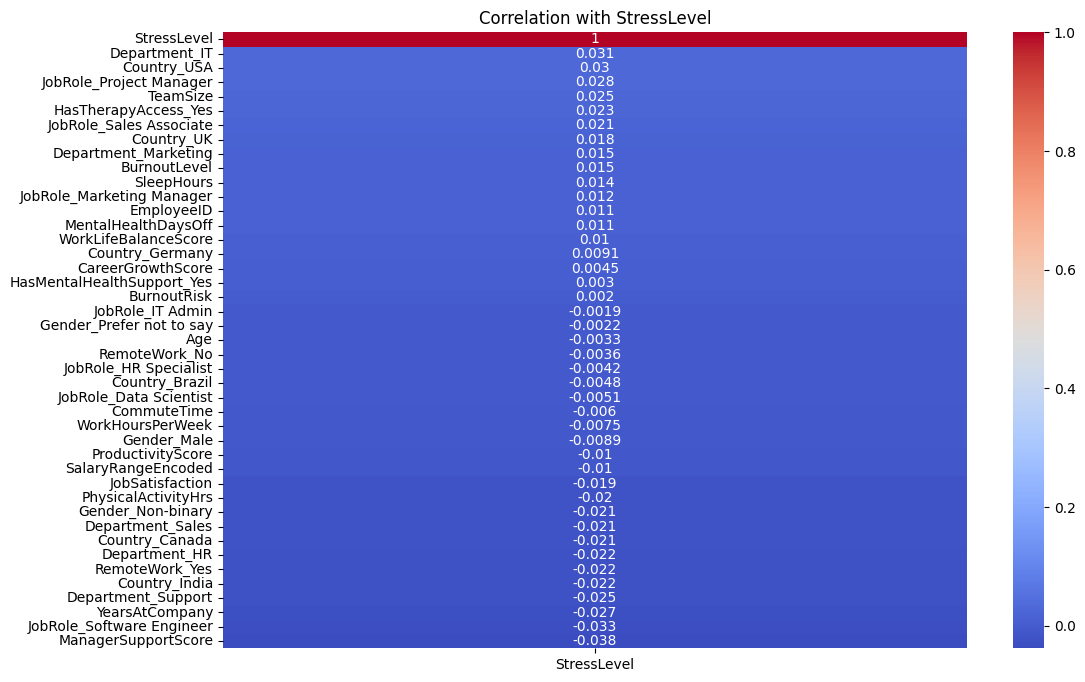

In [ ]:
df_encoded = df_encoded.drop(columns=['SalaryRange'])
corr_matrix = df_encoded.corr()
stress_corr = corr_matrix['StressLevel'].sort_values(ascending=False)
print("Top positive correlations:\n", stress_corr.head(10))
print("\nTop negative correlations:\n", stress_corr.tail(10))
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['StressLevel']].sort_values(by='StressLevel', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with StressLevel")
plt.show()

Mutual Information Feature Selection      
Separated the features (X) and the target (y = StressLevel). Used mutual_info_regression to compute how much information each feature contributes to predicting stress levels. Sorted and displayed the top 10 most informative features, helping identify which inputs are most valuable for regression modeling.

In [ ]:
X = df_encoded.drop(columns=['StressLevel'])
y = df_encoded['StressLevel']
mi_scores = mutual_info_regression(X, y, discrete_features='auto')
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("Top features by Mutual Information:\n", mi_scores.head(10))

Top features by Mutual Information:
 RemoteWork_Yes               0.013686
Country_Germany              0.011622
SleepHours                   0.011003
CareerGrowthScore            0.009676
Country_Brazil               0.009267
ManagerSupportScore          0.009004
SalaryRangeEncoded           0.008987
JobRole_Software Engineer    0.004822
JobRole_HR Specialist        0.004547
HasTherapyAccess_Yes         0.004120
dtype: float64


Interaction Features Creation     
In this step, we created interaction features to capture combined effects of certain variables on stress levels,Sleep_Work_Interaction combines SleepHours and WorkHoursPerWeek, assuming that work and sleep together might influence stress.Support_Career_Interaction combines ManagerSupportScore and CareerGrowthScore to reflect how support and career opportunities together affect an employee’s mental health.

In [ ]:
df_encoded['Sleep_Work_Interaction'] = df_encoded['SleepHours'] * df_encoded['WorkHoursPerWeek']
df_encoded['Support_Career_Interaction'] = df_encoded['ManagerSupportScore'] * df_encoded['CareerGrowthScore']

In [ ]:
df_encoded[['Sleep_Work_Interaction', 'Support_Career_Interaction']].head()

,Sleep_Work_Interaction,Support_Career_Interaction
0,0.094011,-1.265576
1,0.782854,-0.459773
2,-1.585842,-0.663376
3,-2.384232,-0.477895
4,2.007318,0.034002


Regression Model Training & Evaluation      
In this step, we trained three regression models — Linear, Ridge, and Lasso — to predict the target variable StressLevel. The dataset was split into training and testing sets. Each model was evaluated using Mean Squared Error (MSE) and R² score, and the results were stored in a summary DataFrame for comparison. This helps identify which model performs best for predicting stress levels.

In [ ]:
X = df_encoded.drop(columns=['StressLevel', 'EmployeeID'])
y = df_encoded['StressLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
results_df = pd.DataFrame(results).T
print(results_df)

                        MSE        R2
Linear Regression  6.923551 -0.045472
Ridge Regression   6.921893 -0.045222
Lasso Regression   6.818723 -0.029643


Summary    
Successfully cleaned and transformed the dataset, selected relevant features, and built multiple regression models to predict stress — setting a strong base for further improvements.